In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [29]:
# The code was removed by DSX for sharing.

In [30]:
cloudantdata = spark.read.format("org.apache.bahir.cloudant")\
.option("cloudant.host",credentials_1['host'])\
.option("cloudant.username", credentials_1['username'])\
.option("cloudant.password", credentials_1['password'])\
.load("crimes")

In [31]:
cloudantdata.printSchema
cloudantdata.count()

19

In [32]:
cloudantdata.select("properties.naturecode").show()

+----------+
|naturecode|
+----------+
|    IVPREM|
|    LARCEN|
|    LARCEN|
|      PROP|
|     IVPER|
|    LARCEN|
|      DVIP|
|     IVPER|
|        BE|
|    LARCEN|
|    VIORDR|
|    LARCEN|
|      IVMV|
|    VIORDR|
|       MVA|
|    LARCEN|
|      PROP|
|    INVEST|
|     IVPER|
+----------+



In [33]:
disturbDF = cloudantdata.filter("properties.naturecode = 'PROP'")
disturbDF.show()

+--------------------+--------------------+--------------------+--------------------+-------+
|                 _id|                _rev|            geometry|          properties|   type|
+--------------------+--------------------+--------------------+--------------------+-------+
|79f14b64c57461584...|1-816e850ff5ec224...|[WrappedArray(-71...|[142036397,false,...|Feature|
|79f14b64c57461584...|1-e557e2555201054...|[WrappedArray(-71...|[142045880,false,...|Feature|
+--------------------+--------------------+--------------------+--------------------+-------+



In [35]:
disturbDF.select("properties").write.format("org.apache.bahir.cloudant")\
.option("cloudant.host",credentials_1['host'])\
.option("cloudant.username",credentials_1['username'])\
.option("cloudant.password",credentials_1['password'])\
.option("createDBOnSave", "true")\
.save("crimes_filtered_2")

In [36]:
reducedValue = cloudantdata.groupBy("properties.naturecode").count()
reducedValue.printSchema()

root
 |-- naturecode: string (nullable = true)
 |-- count: long (nullable = false)



In [37]:
import pprint
from collections import Counter

In [38]:
from pyspark.sql import *
from pyspark.sql.functions import udf, asc, desc
from pyspark import SparkContext, SparkConf
from pyspark.sql.types import IntegerType

In [39]:
import pandas as pd
pandaDF = reducedValue.orderBy(desc("count"), asc("naturecode")).toPandas()
print(pandaDF)

  naturecode  count
0     LARCEN      6
1      IVPER      3
2       PROP      2
3     VIORDR      2
4         BE      1
5       DVIP      1
6     INVEST      1
7       IVMV      1
8     IVPREM      1
9        MVA      1


In [40]:
 %matplotlib inline

In [41]:
import matplotlib.pyplot as plt

In [42]:
values = pandaDF['count']

In [43]:
labels = pandaDF['naturecode']

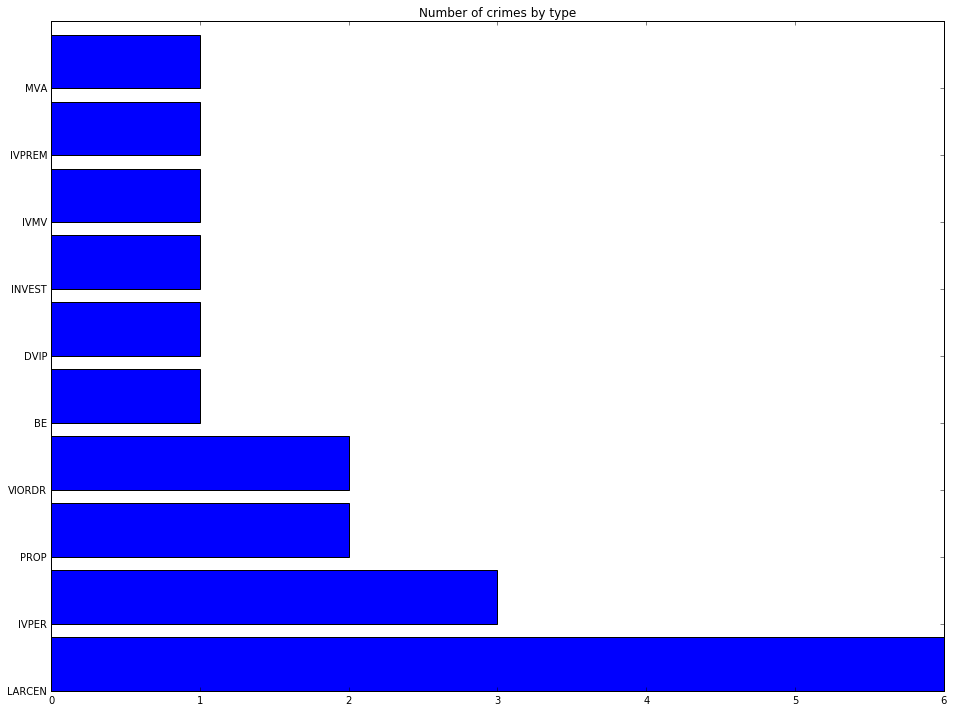

In [44]:
plt.gcf().set_size_inches(16, 12, forward=True)
plt.title('Number of crimes by type')

plt.barh(range(len(values)), values)
plt.yticks(range(len(values)), labels)

plt.show()